# Business case: Predicting quality of wine with given feature.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from scipy import stats

In [2]:
data=pd.read_csv('wine.csv')

In [3]:
data.head()

,wine,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
data.tail()

,wine,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [5]:
data.shape

(178, 14)

In [6]:
data.wine.value_counts()

2    71
1    59
3    48
Name: wine, dtype: int64

# Exploratory data analysis

# univariant analysis


In [7]:
# renaming the columns
data.rename(columns={'wine':'wine','Alcohol':'alcohol',
                     'Malic acid':'malic_acid', 
                     'Ash':'ash',
                     'Alcalinity of ash':'AOA',
                    'Magnesium':'magnesium',
                    'Total phenols':'tot_phenols',
                    'Flavanoids':'flavanoids',
                    'Nonflavanoid phenols':'nonflavanoid_phenols',
                    'Proanthocyanins':'proanthocyanins',
                    'Color intensity':'color_intensity',
                    'Hue':'hue',
                    'OD280/OD315 of diluted wines':'diluted_wines',
                    'Proline':'proline'},inplace=True)

In [8]:
data.columns

Index(['wine', 'alcohol', 'malic_acid', 'ash', 'AOA', 'magnesium',
       'tot_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins',
       'color_intensity', 'hue', 'diluted_wines', 'proline'],
      dtype='object')

In [9]:
box=data.iloc[:,1:]

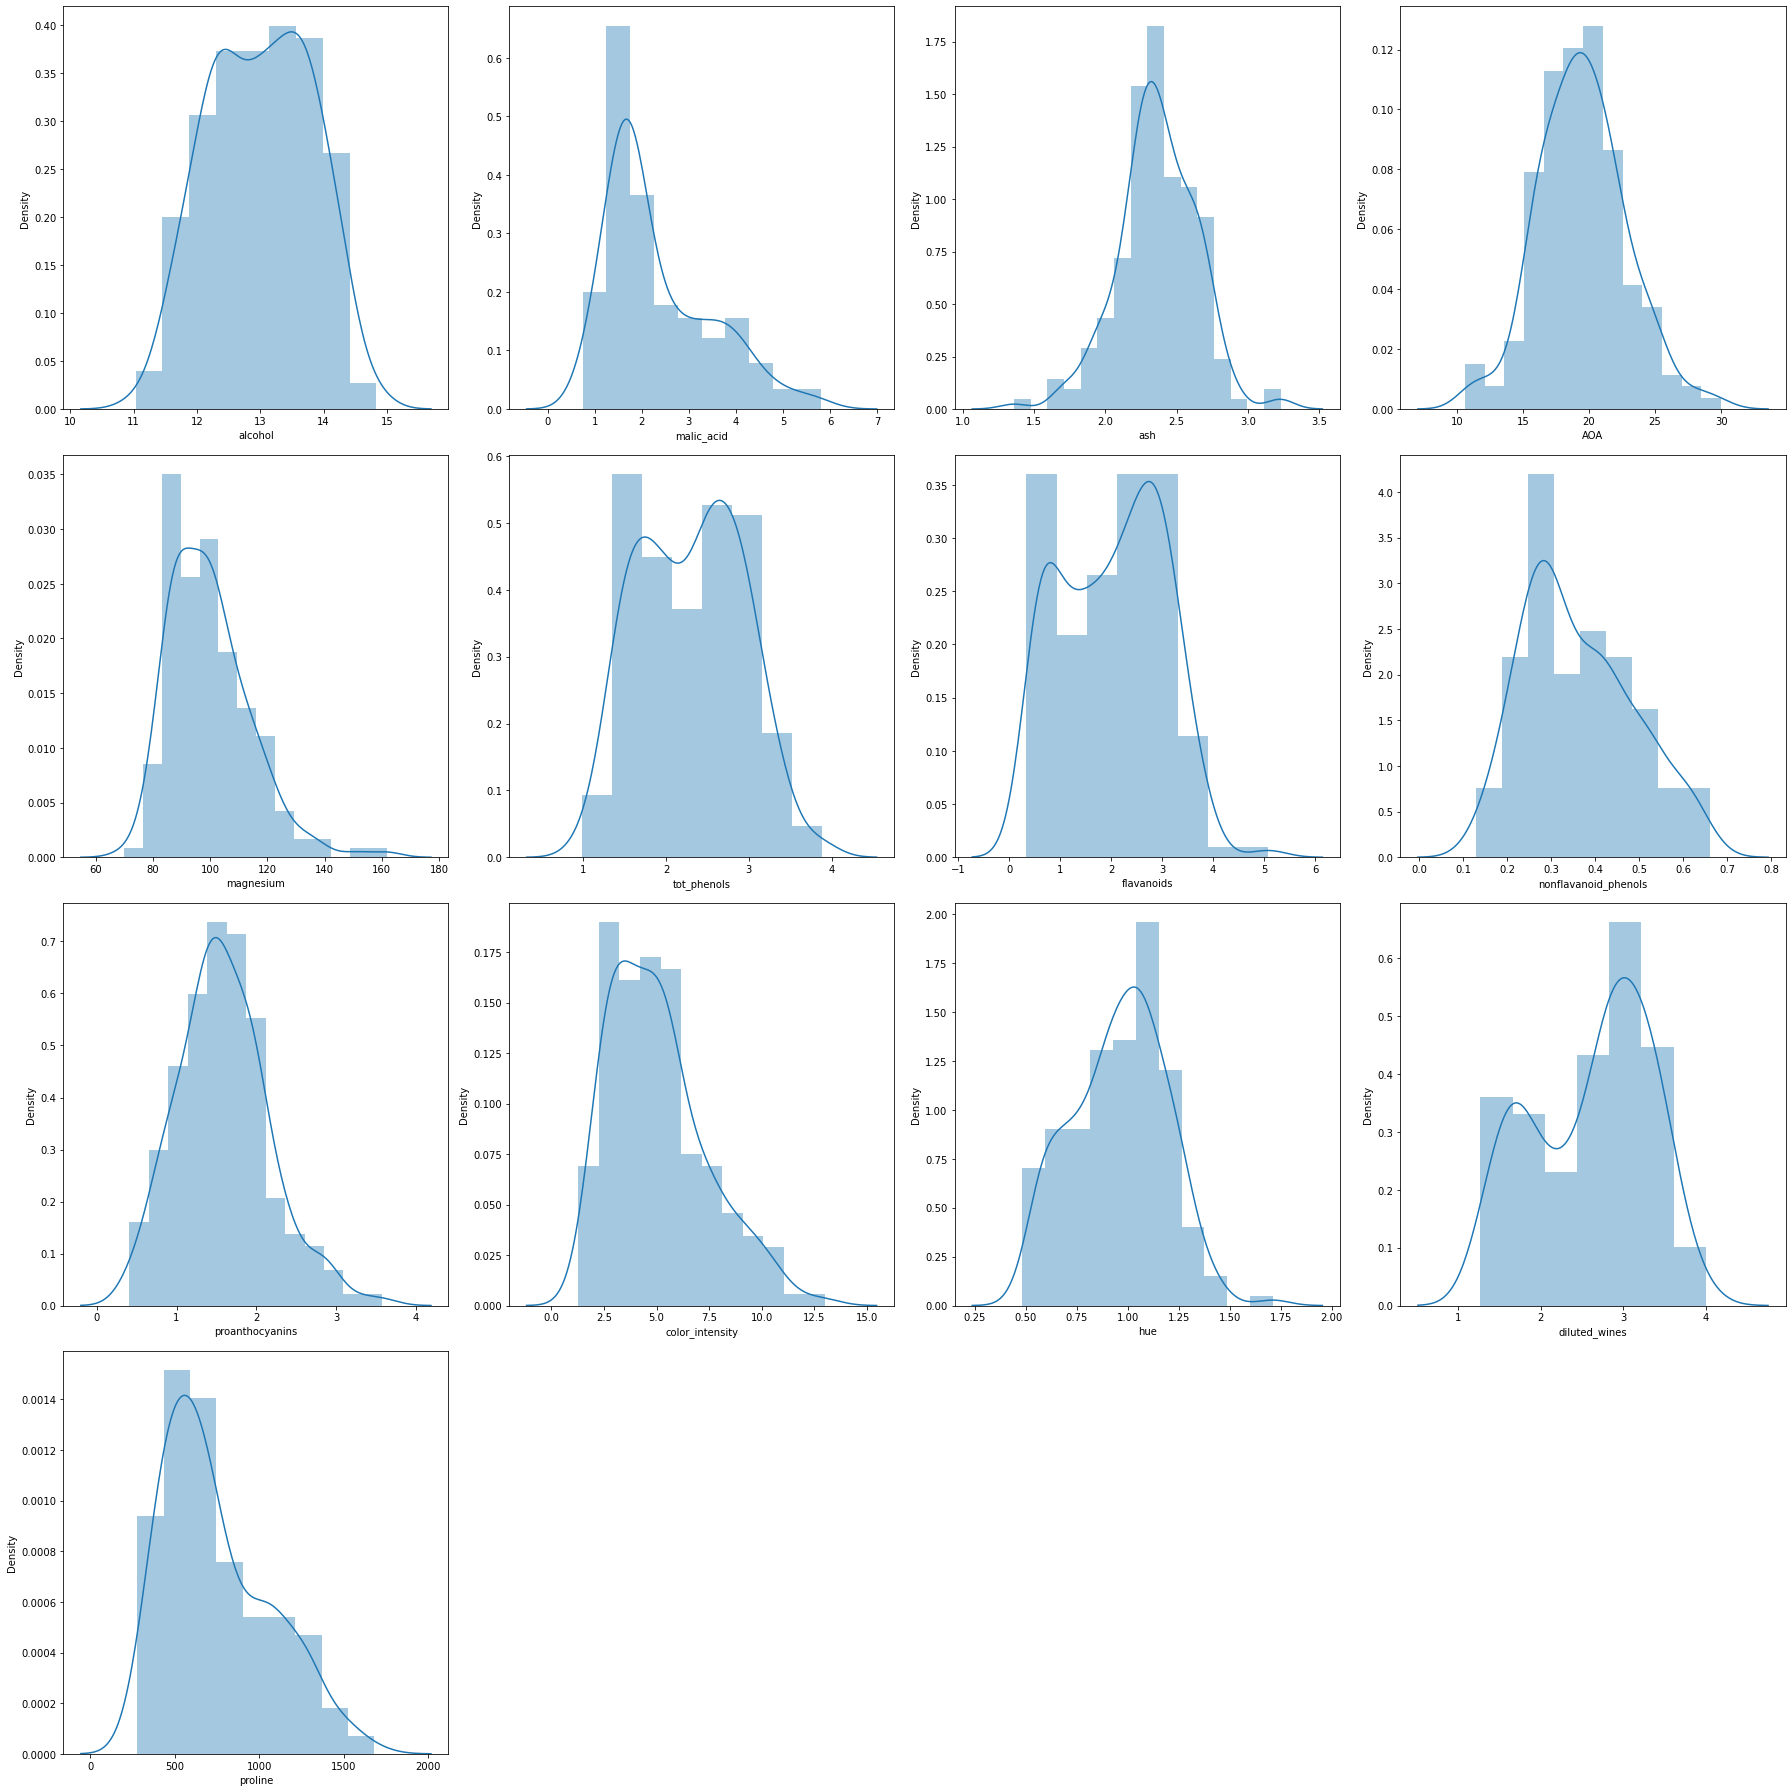

In [10]:
plt.figure(figsize=(25,25),facecolor='white')
plotnum=1
for c in box:
    if(plotnum<14):
        ax=plt.subplot(4,4,plotnum)
        sns.distplot(box[c])
    plotnum+=1
plt.tight_layout()    

# Bivariant Analysis

In [11]:
# analysis of continuous variable with target variable

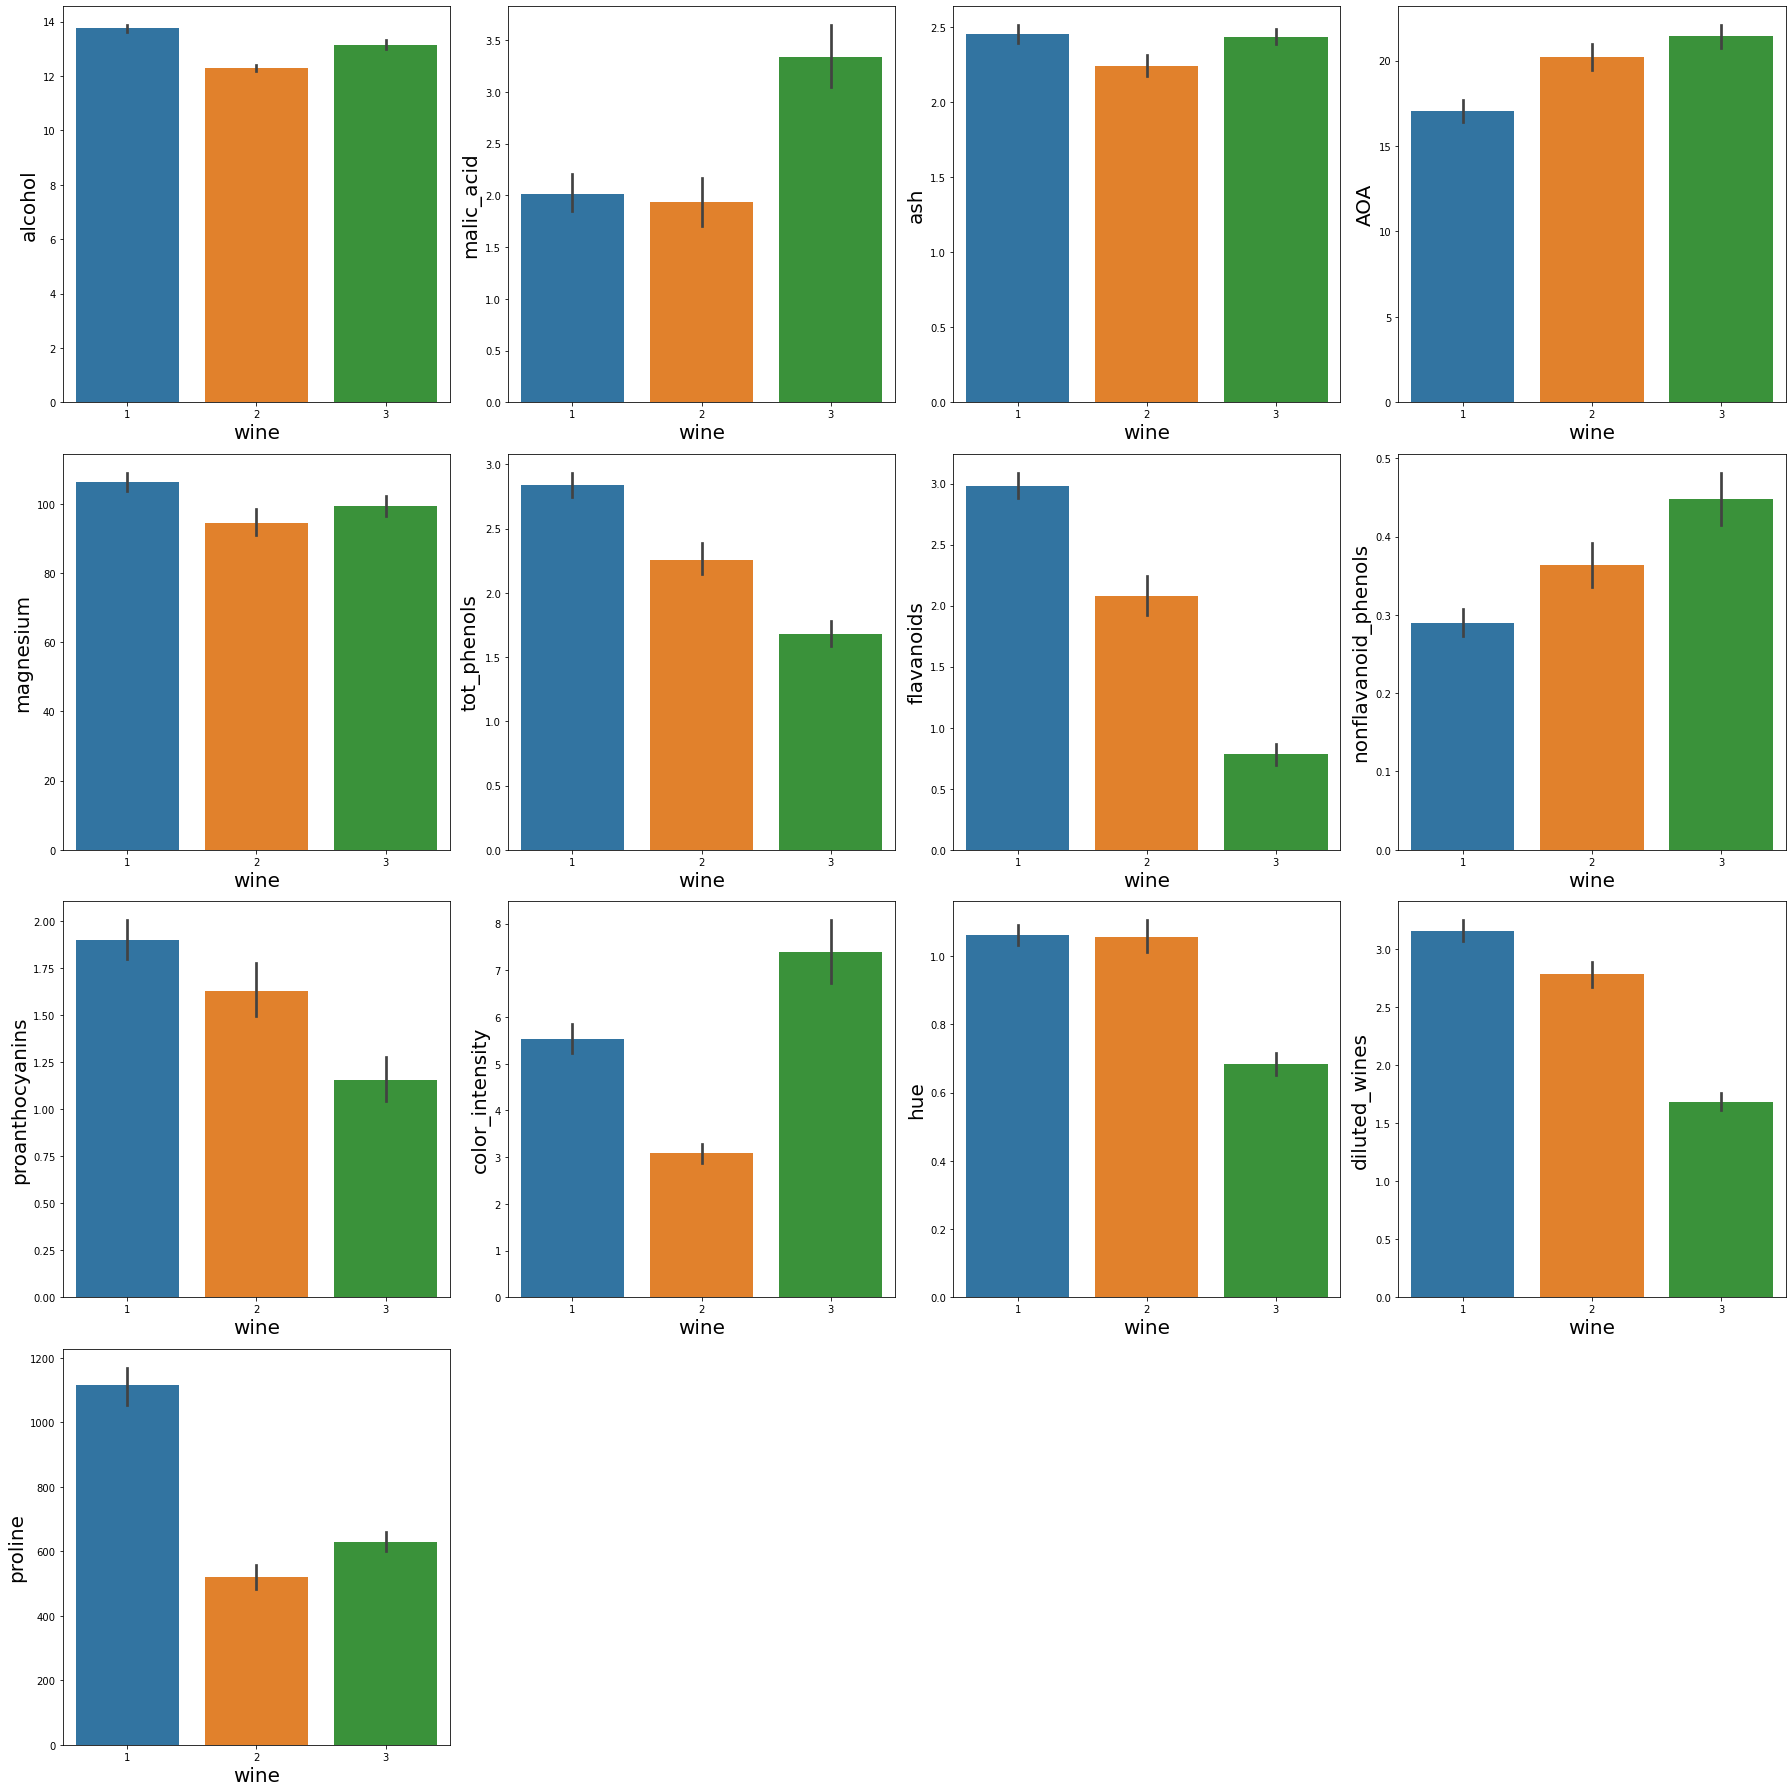

In [12]:
plt.figure(figsize=(25,25),facecolor='white')
plotnum=1
for c in box:
    if(plotnum<14):
        ax=plt.subplot(4,4,plotnum)
        sns.barplot(x=data.wine,y=box[c])
        plt.xlabel('wine',fontsize=20)
        plt.ylabel(c,fontsize=20)
    plotnum+=1
plt.tight_layout()

# data preprocessing

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   wine                  178 non-null    int64  
 1   alcohol               178 non-null    float64
 2   malic_acid            178 non-null    float64
 3   ash                   178 non-null    float64
 4   AOA                   178 non-null    float64
 5   magnesium             178 non-null    int64  
 6   tot_phenols           178 non-null    float64
 7   flavanoids            178 non-null    float64
 8   nonflavanoid_phenols  178 non-null    float64
 9   proanthocyanins       178 non-null    float64
 10  color_intensity       178 non-null    float64
 11  hue                   178 non-null    float64
 12  diluted_wines         178 non-null    float64
 13  proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [14]:
for c in data.columns:    #columns from datasets
    if (data[c].dtype==object):    #checking datatype of labels
        print(c)

In [15]:
c

'proline'

# checking outliers

In [16]:
data_box=data[['wine','alcohol','malic_acid','ash','AOA','magnesium',
               'tot_phenols','flavanoids','nonflavanoid_phenols',
               'proanthocyanins','color_intensity','hue',
               'diluted_wines','proline']]

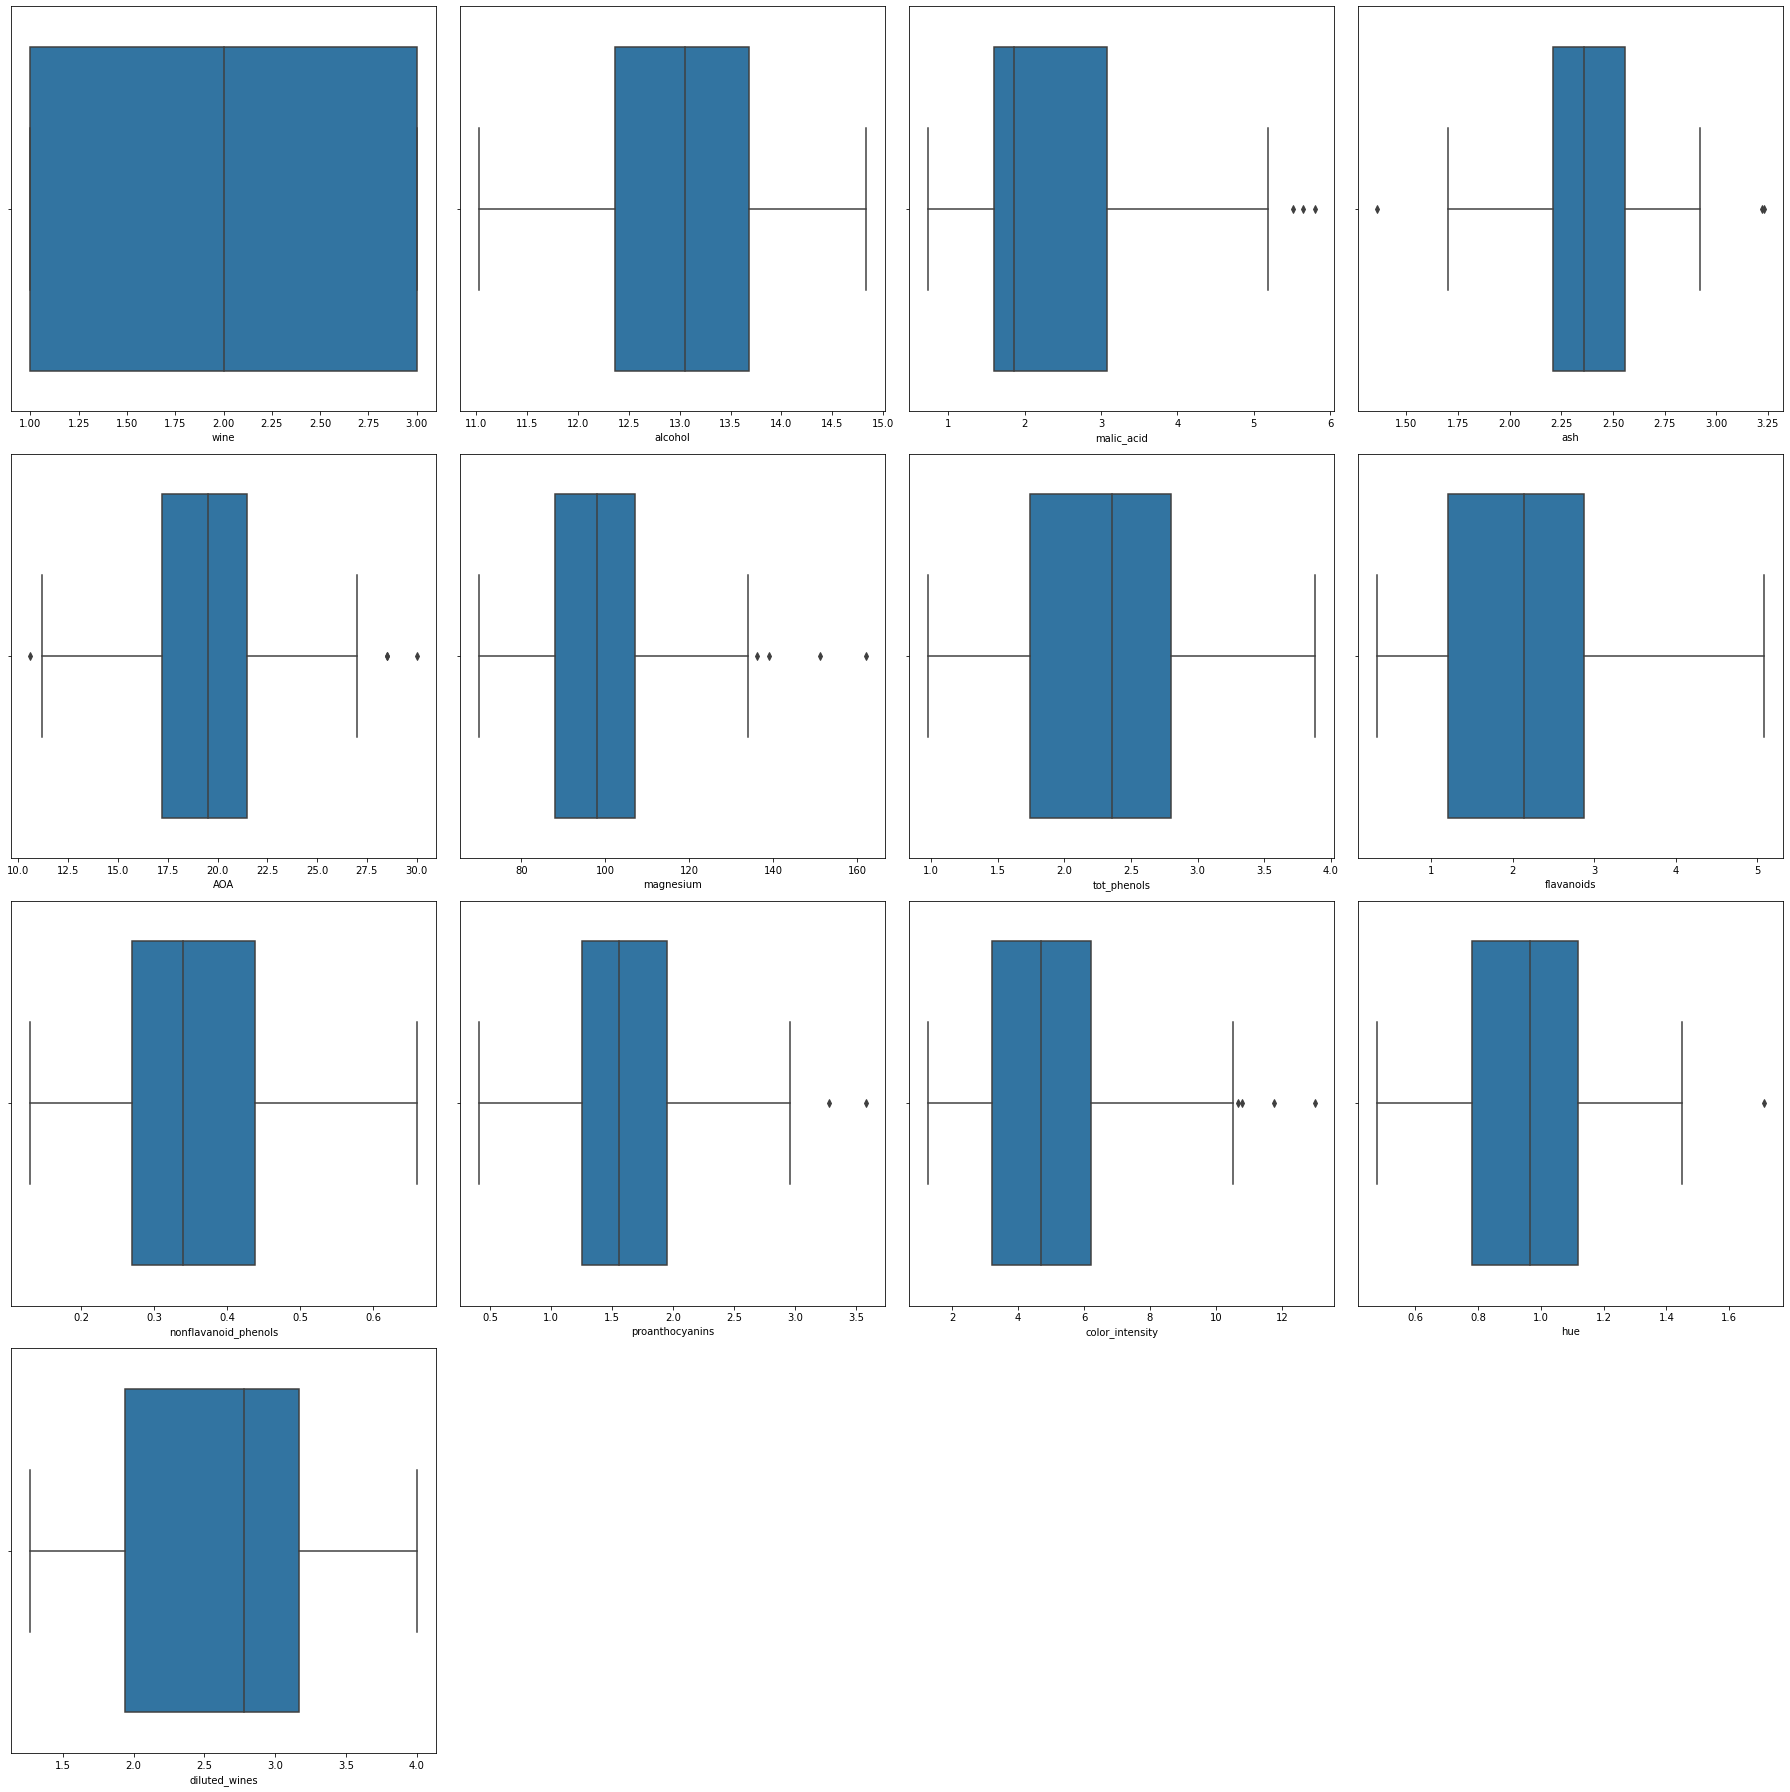

In [17]:
plt.figure(figsize=(25,25),facecolor='white')
plotnumber=1
for column in data_box:
    if(plotnumber<14):
        ax=plt.subplot(4,4,plotnumber)
        sns.boxplot(data[column])
    plotnumber+=1
plt.tight_layout()

In [18]:
data_dist=data[['malic_acid','ash','AOA','magnesium','proanthocyanins',
               'color_intensity','hue']]

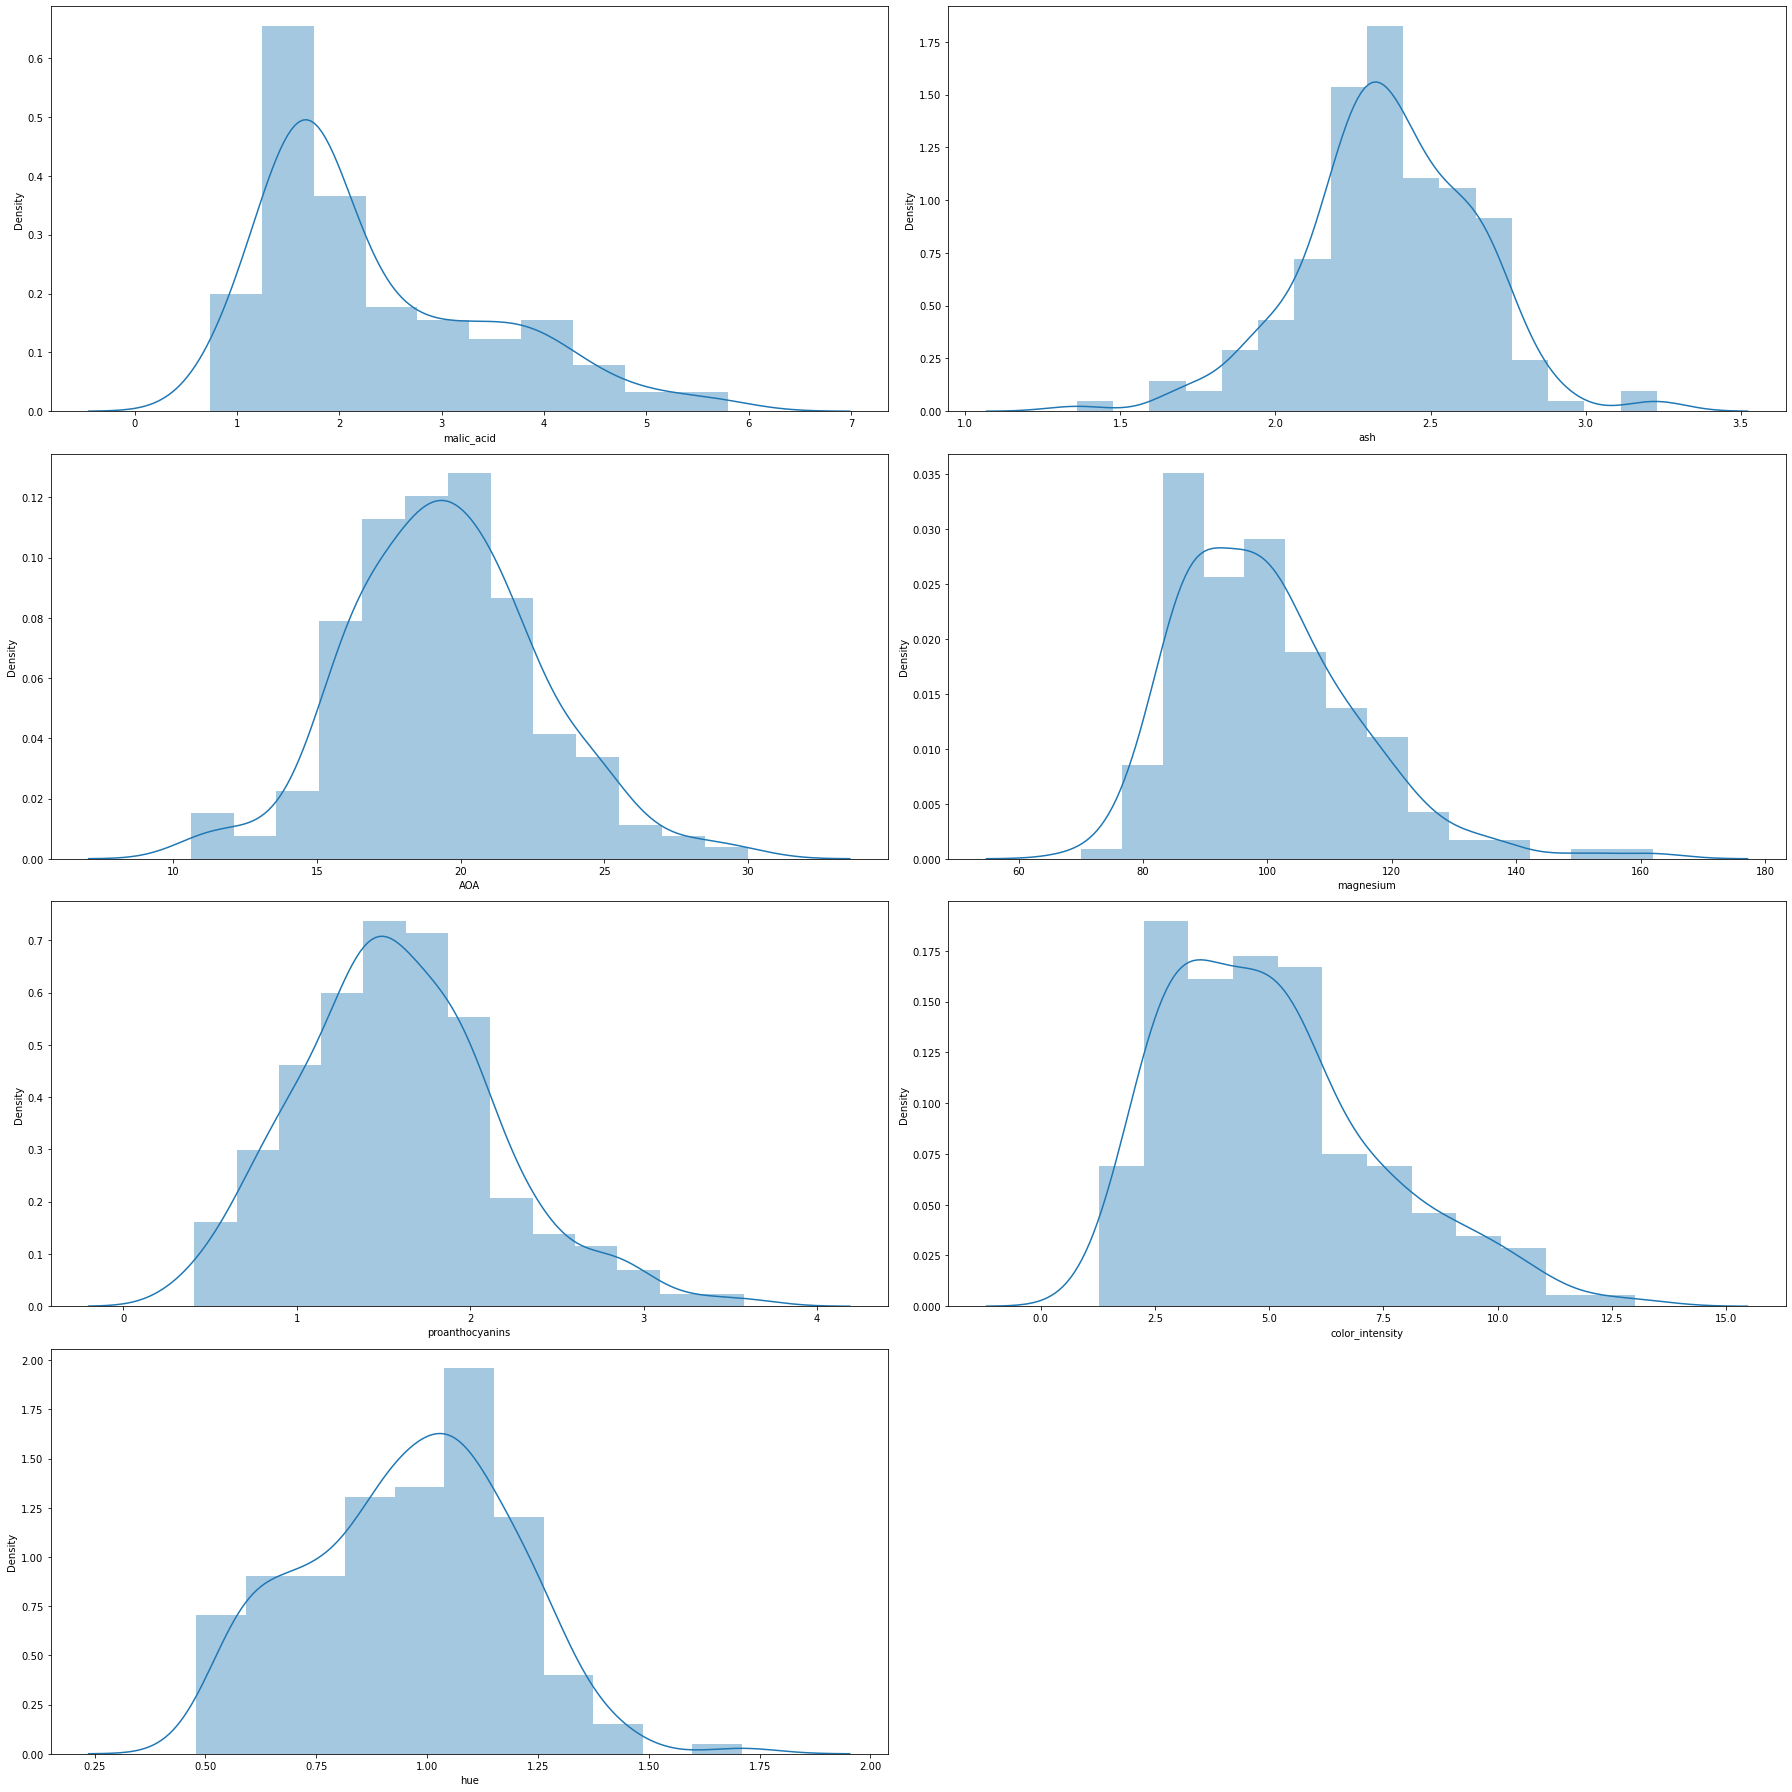

In [19]:
plt.figure(figsize=(25,25),facecolor='white')
plotnumber=1
for column in data_dist:
    if plotnumber<=9 :
        ax=plt.subplot(4,2,plotnumber)
        sns.distplot(data[column])
    plotnumber+=1
plt.tight_layout()

# M-acid

In [20]:
##using IQR to remove the outliers
IQR=stats.iqr(data.malic_acid,interpolation='midpoint')
IQR

1.46

In [21]:
#min & max calculations

#first quartile
Q1=data.malic_acid.quantile(0.25)

#Third quartile
Q3=data.malic_acid.quantile(0.75)

#getting the limits
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR

In [22]:
min_limit

-0.5874999999999999

In [23]:
max_limit

5.2725

In [24]:
data.loc[data['malic_acid'] > max_limit]

,wine,alcohol,malic_acid,ash,AOA,magnesium,tot_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,diluted_wines,proline
123,2,13.05,5.80,2.13,21.5,86,2.62,2.65,0.30,2.01,2.6,0.73,3.10,380
137,3,12.53,5.51,2.64,25.0,96,1.79,0.60,0.63,1.10,5.0,0.82,1.69,515
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740


In [25]:
data.loc[data['malic_acid'] < min_limit]

,wine,alcohol,malic_acid,ash,AOA,magnesium,tot_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,diluted_wines,proline


In [26]:
data.loc[data['malic_acid'] > max_limit,'malic_acid']=np.median(data.malic_acid)

<AxesSubplot:xlabel='malic_acid'>

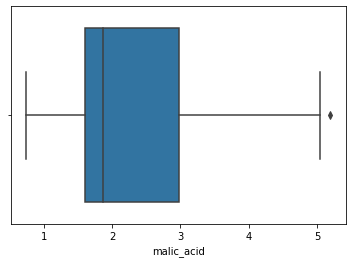

In [27]:
sns.boxplot(data.malic_acid)

In [28]:
data.malic_acid=np.sqrt(data.malic_acid)

<AxesSubplot:xlabel='malic_acid'>

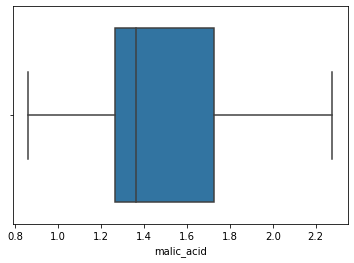

In [29]:
sns.boxplot(data.malic_acid)

# color Intensity

In [30]:
# using IQR to remove outlier
IQR=stats.iqr(data.color_intensity,interpolation='midpoint')

In [31]:
IQR

2.97

In [32]:
Q1=data.color_intensity.quantile(0.25)

Q2=data.color_intensity.quantile(0.75)

min_limit=Q1-1.5*IQR

max_limit=Q3+1.5*IQR

In [33]:
min_limit

-1.2350000000000003

In [34]:
max_limit

7.5375

In [35]:
data.loc[data['color_intensity'] < min_limit]

,wine,alcohol,malic_acid,ash,AOA,magnesium,tot_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,diluted_wines,proline


In [36]:
data.loc[data['color_intensity'] > max_limit]

,wine,alcohol,malic_acid,ash,AOA,magnesium,tot_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,diluted_wines,proline
3,1,14.37,1.396424,2.50,16.8,113,3.85,3.49,0.24,2.18,7.800000,0.86,3.45,1480
18,1,14.19,1.260952,2.48,16.5,108,3.30,3.93,0.32,1.86,8.700000,1.23,2.82,1680
49,1,13.94,1.315295,2.27,17.4,108,2.88,3.54,0.32,2.08,8.900000,1.12,3.10,1260
144,3,12.25,1.969772,2.20,18.5,112,1.38,0.78,0.29,1.14,8.210000,0.65,2.00,855
147,3,12.87,2.147091,2.48,21.5,86,1.70,0.65,0.47,0.86,7.650000,0.54,1.86,625
148,3,13.32,1.800000,2.38,21.5,92,1.93,0.76,0.45,1.25,8.420000,0.55,1.62,650
149,3,13.08,1.974842,2.36,21.5,113,1.41,1.39,0.34,1.14,9.400000,0.57,1.33,550
150,3,13.50,1.766352,2.62,24.0,123,1.40,1.57,0.22,1.25,8.600000,0.59,1.30,500
151,3,12.79,1.634013,2.48,22.0,112,1.48,1.36,0.24,1.26,10.800000,0.48,1.47,480
153,3,13.23,1.816590,2.28,18.5,98,1.80,0.83,0.61,1.87,10.520000,0.56,1.51,675


In [37]:
data.loc[data['color_intensity'] > max_limit,'color_intensity']=np.median(data.color_intensity)

<AxesSubplot:xlabel='color_intensity'>

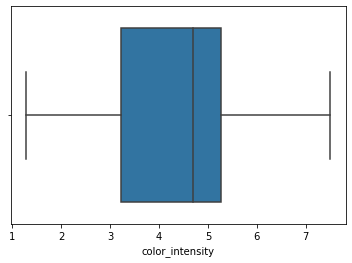

In [38]:
sns.boxplot(data.color_intensity)

# Hue

In [39]:
IQR=stats.iqr(data.hue,interpolation='midpoint')

In [40]:
IQR

0.3350000000000001

In [41]:
Q1=data.hue.quantile(0.25)
Q3=data.hue.quantile(0.75)

min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR

In [42]:
min_limit

0.2799999999999998

In [43]:
max_limit

1.6225000000000003

In [44]:
data.loc[data['hue'] < min_limit]

,wine,alcohol,malic_acid,ash,AOA,magnesium,tot_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,diluted_wines,proline


In [45]:
data.loc[data['hue'] > max_limit]

,wine,alcohol,malic_acid,ash,AOA,magnesium,tot_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,diluted_wines,proline
115,2,11.03,1.228821,2.2,21.5,85,2.46,2.17,0.52,2.01,1.9,1.71,2.87,407


In [46]:
data.loc[data['hue']>max_limit,'hue']=np.median(data.hue)

<AxesSubplot:xlabel='hue'>

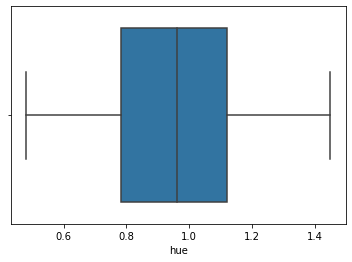

In [47]:
sns.boxplot(data.hue)

# proanthocyanins

In [48]:
IQR = stats.iqr(data.proanthocyanins, interpolation='midpoint')

IQR

0.7

In [49]:
Q1= data.proanthocyanins.quantile(0.25)

Q3= data.proanthocyanins.quantile(0.75)

min_limit= Q1 - 1.5*IQR

max_limit= Q3 + 1.5*IQR

In [50]:
min_limit

0.20000000000000018

In [51]:
max_limit

3.0

In [52]:
data.loc[data['proanthocyanins'] > max_limit]

,wine,alcohol,malic_acid,ash,AOA,magnesium,tot_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,diluted_wines,proline
95,2,12.47,1.232883,2.20,19.0,162,2.50,2.27,0.32,3.28,2.6,1.16,2.63,937
110,2,11.46,1.933908,1.82,19.5,107,3.18,2.58,0.24,3.58,2.9,0.75,2.81,562


In [53]:
data.loc[data['proanthocyanins'] < min_limit]

,wine,alcohol,malic_acid,ash,AOA,magnesium,tot_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,diluted_wines,proline


In [54]:
data.loc[data['proanthocyanins'] > max_limit,'proanthocyanins']=np.median(data.proanthocyanins)

In [55]:
data.loc[data['proanthocyanins'] < min_limit,'proanthocyanins']=np.median(data.proanthocyanins)

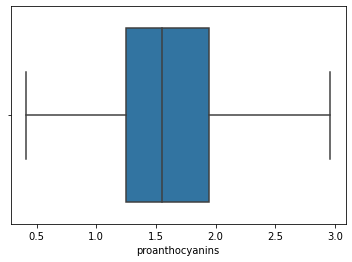

In [56]:
sns.boxplot(data.proanthocyanins)
plt.show()

# Alcalinity of ASH

In [57]:
upper_limit=data.AOA.mean() + 3*data.AOA.std()
lower_limit=data.AOA.mean() - 3*data.AOA.std()

In [58]:
upper_limit

29.513635121745235

In [59]:
lower_limit

9.476252518704204

In [60]:
data.loc[data['AOA'] > upper_limit]

,wine,alcohol,malic_acid,ash,AOA,magnesium,tot_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,diluted_wines,proline
73,2,12.99,1.292285,2.6,30.0,139,3.3,2.89,0.21,1.96,3.35,1.31,3.5,985


In [61]:
data.loc[data['AOA'] < lower_limit]

,wine,alcohol,malic_acid,ash,AOA,magnesium,tot_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,diluted_wines,proline


In [62]:
data.loc[data['AOA'] > upper_limit,'AOA']=np.mean(data.AOA)

<AxesSubplot:xlabel='AOA'>

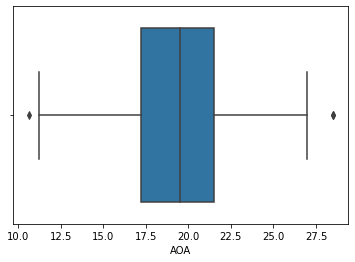

In [63]:
sns.boxplot(data.AOA)

# Magnesium

In [64]:
upper_limit=data.magnesium.mean()+3*data.magnesium.std()
lower_limit=data.magnesium.mean()-3*data.magnesium.std()

In [65]:
upper_limit

142.58902357959488

In [66]:
lower_limit

56.89412248782086

In [67]:
data.loc[data['magnesium'] < lower_limit]

,wine,alcohol,malic_acid,ash,AOA,magnesium,tot_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,diluted_wines,proline


In [68]:
data.loc[data['magnesium'] > upper_limit]

,wine,alcohol,malic_acid,ash,AOA,magnesium,tot_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,diluted_wines,proline
69,2,12.21,1.090871,1.75,16.8,151,1.85,1.28,0.14,2.500,2.85,1.28,3.07,718
95,2,12.47,1.232883,2.20,19.0,162,2.50,2.27,0.32,1.555,2.60,1.16,2.63,937


In [69]:
data.loc[data['magnesium'] > upper_limit,'magnesium']=np.mean(data.magnesium)

<AxesSubplot:xlabel='magnesium'>

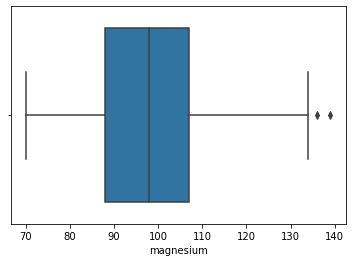

In [70]:
sns.boxplot(data.magnesium)

# Ash

In [71]:
IQR=stats.iqr(data.ash,interpolation='midpoint')

In [72]:
IQR

0.34499999999999975

In [73]:
Q1=data.ash.quantile(0.25)
Q3=data.ash.quantile(0.75)

lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

In [74]:
lower_limit

1.6925000000000003

In [75]:
upper_limit

3.0749999999999997

In [76]:
data.loc[data['ash'] < lower_limit]

,wine,alcohol,malic_acid,ash,AOA,magnesium,tot_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,diluted_wines,proline
59,2,12.37,0.969536,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520


In [77]:
data.loc[data['ash'] > upper_limit]

,wine,alcohol,malic_acid,ash,AOA,magnesium,tot_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,diluted_wines,proline
25,1,13.05,1.431782,3.22,25.0,124.0,2.63,2.68,0.47,1.92,3.58,1.13,3.20,830
121,2,11.56,1.431782,3.23,28.5,119.0,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465


In [78]:
data.loc[data['ash'] < lower_limit,'ash']=np.mean(data.ash)

In [79]:
data.loc[data['ash']> upper_limit,'ash']=np.mean(data.ash)

<AxesSubplot:xlabel='ash'>

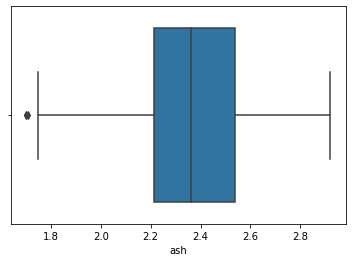

In [80]:
sns.boxplot(data.ash)

# Left over outliers

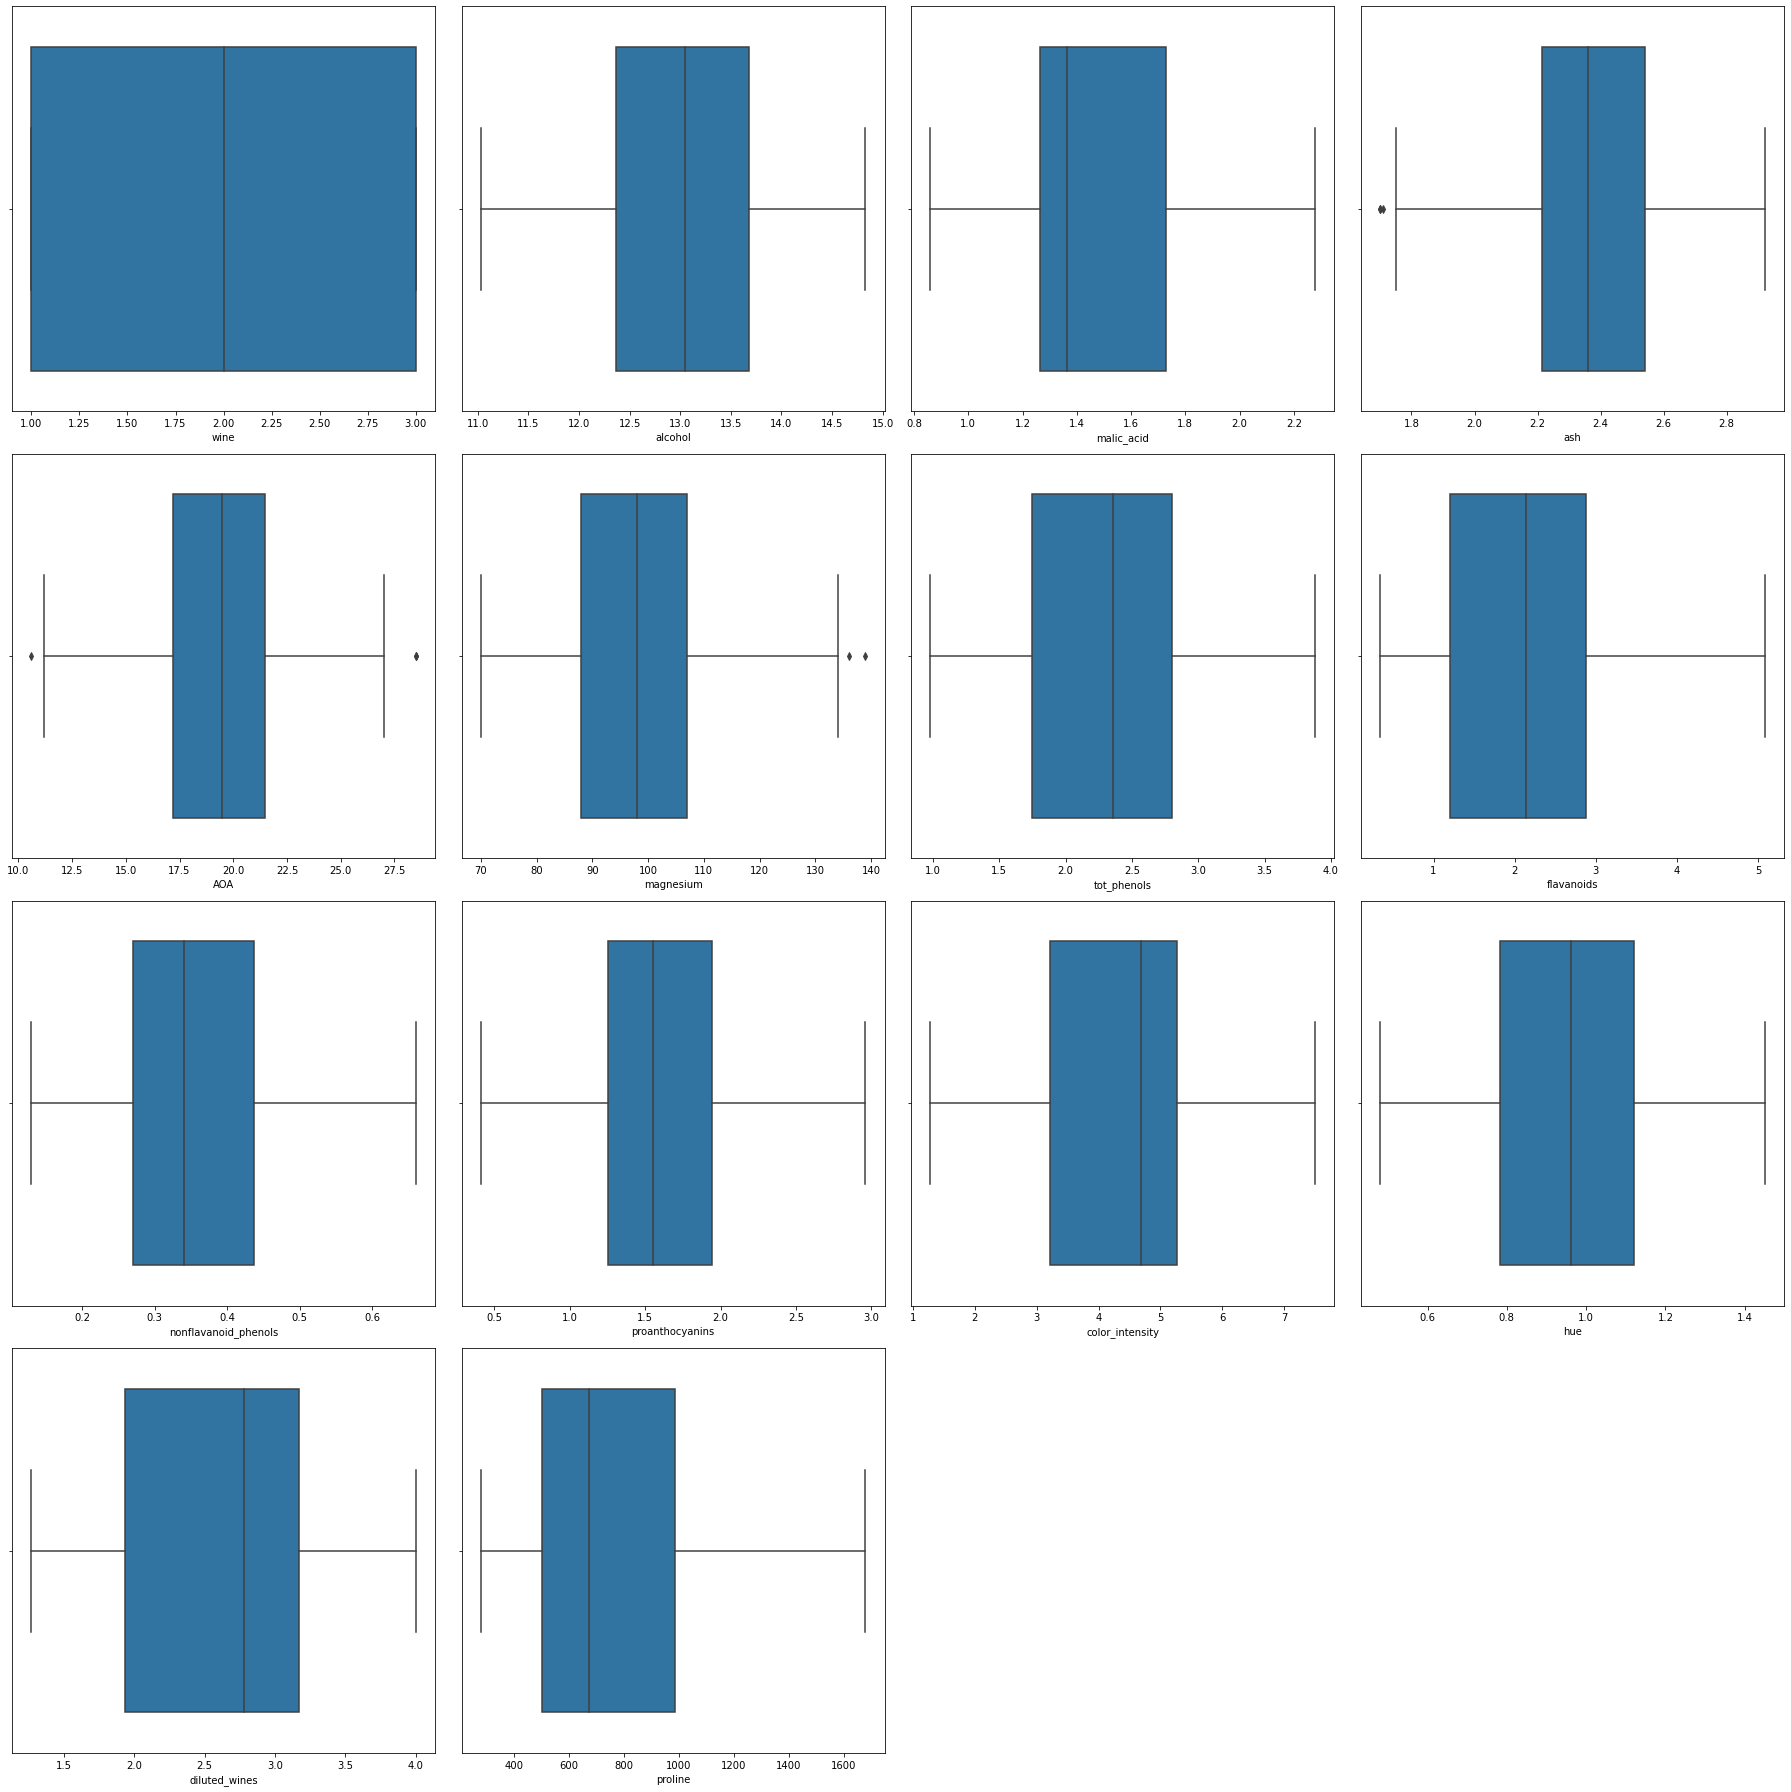

In [81]:
plt.figure(figsize=(25,25),facecolor='white')
plotnumber=1 
for column in data_box:
    if plotnumber<16:
        ax=plt.subplot(4,4,plotnumber)
        sns.boxplot(data[column])
    plotnumber+=1
plt.tight_layout()

# ASh,Magnetium,Alcalinity of ASH have limits more than 5% so no outliers handling

# Feature selection

<AxesSubplot:>

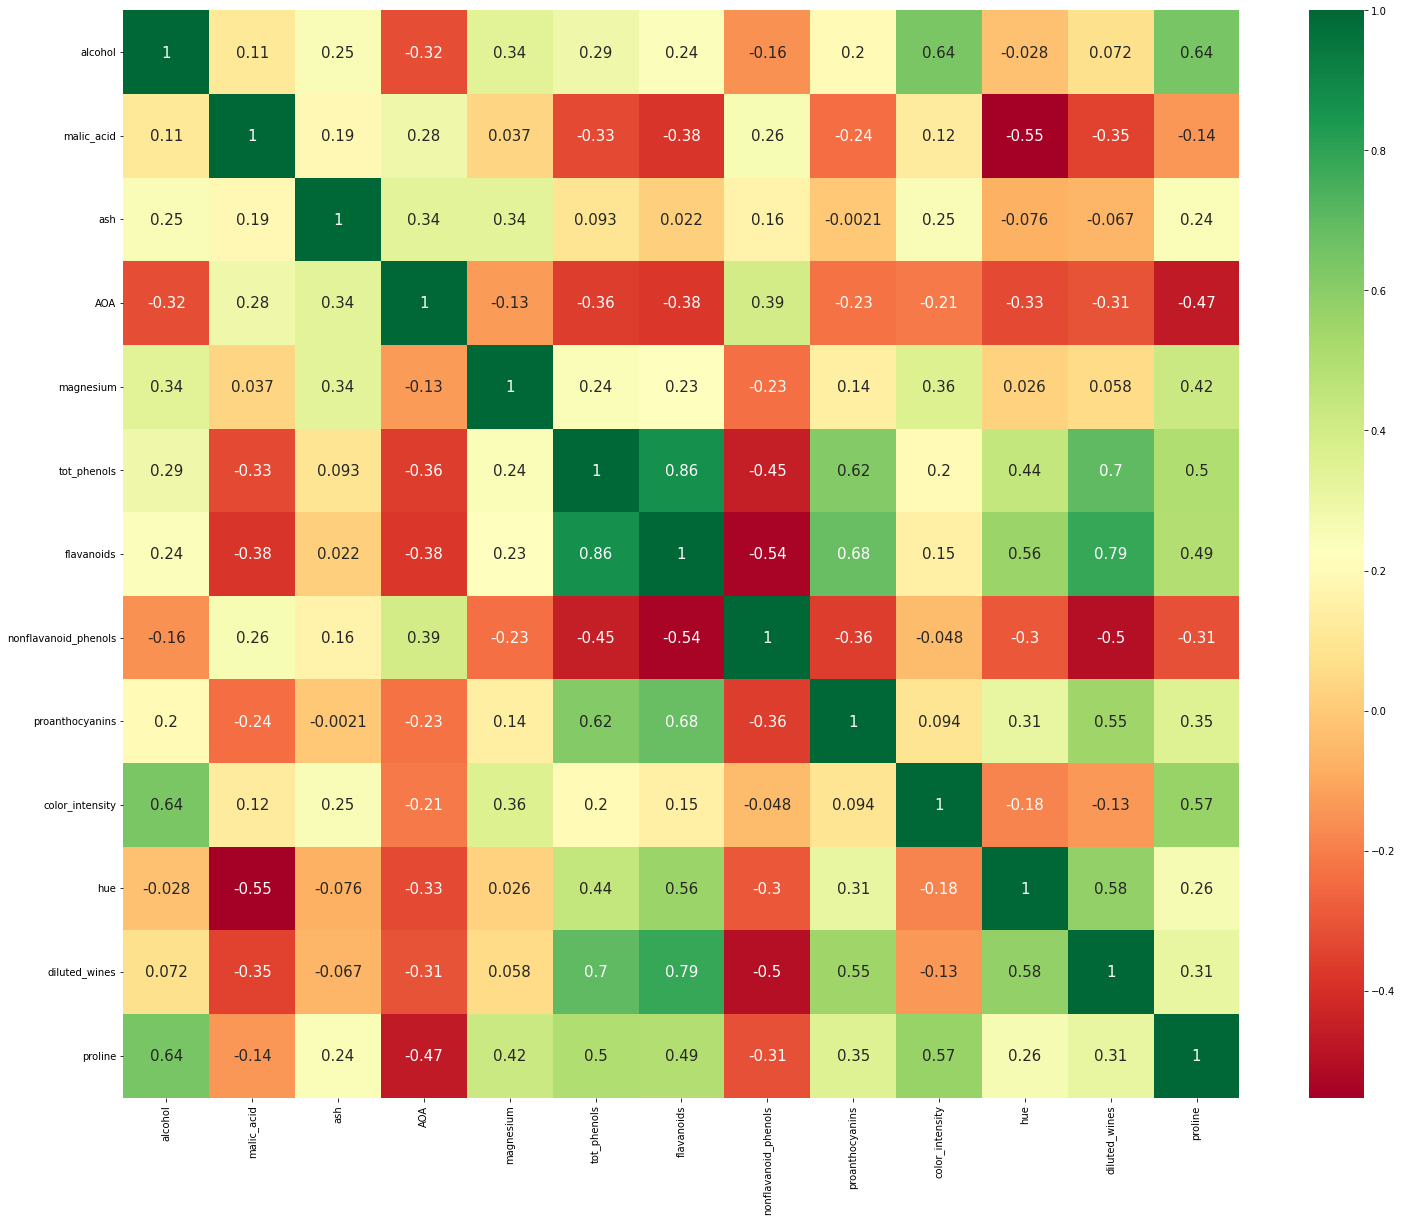

In [82]:
plt.figure(figsize=(25,20))
sns.heatmap(data.drop('wine',axis=1).corr(),annot=True,cmap='RdYlGn',annot_kws={'size':15})

# There is no co-relation between any column

# Model Creation

In [83]:
# creating dependent & independent variables
x=data.iloc[:,1:]
y=data.wine

In [84]:
# creating training testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [85]:
x_test.shape

(36, 13)

In [86]:
y_test.shape

(36,)

In [87]:
from sklearn.neighbors import KNeighborsClassifier   ## using knn
KNN1=KNeighborsClassifier()            ## model object creation
KNN1.fit(x_train,y_train)              ## fitting the model
y_hat_knn=KNN1.predict(x_test)        ## getting the predict from created model

In [88]:
from sklearn.metrics import f1_score
f1_knn=f1_score(y_test,y_hat_knn,average='weighted')  ## checking model percentage
f1_knn

0.5917832167832169

# using bagging

In [89]:
from sklearn.ensemble import BaggingClassifier #import bagging
KNN2=KNeighborsClassifier() # model not seen in any data
model_bagg1=BaggingClassifier(base_estimator=KNN2,n_estimators=45)  ## model
## base estimator------>algorithm which we have to pass
## n estimator-----> number of base learner(45 take as random number)
model_bagg1.fit(x_train,y_train) ## fitting the model
y_hat_bagg=model_bagg1.predict(x_test)  ##  getting the prediction



In [90]:
f1_bagg=f1_score(y_test,y_hat_bagg,average='weighted') # f1_score calculation

In [91]:
f1_bagg  ## score after bagging

0.6388888888888888

# SMOTE Technique

In [92]:
from collections import Counter
from imblearn.over_sampling import SMOTE
sm=SMOTE()
print(Counter(y))
x_sm,y_sm=sm.fit_resample(x,y)
print(Counter(y_sm))

Counter({2: 71, 1: 59, 3: 48})
Counter({1: 71, 2: 71, 3: 71})


In [93]:
x_train.shape

(142, 13)

In [94]:
y_train.shape

(142,)

# prediction from kneighbors

In [96]:
from sklearn.neighbors import KNeighborsClassifier
error_rate=[]
for i in range(1,11):
    KNN=KNeighborsClassifier(n_neighbors=i)
    KNN.fit(x_train,y_train)
    pred_i=KNN.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'K Value')

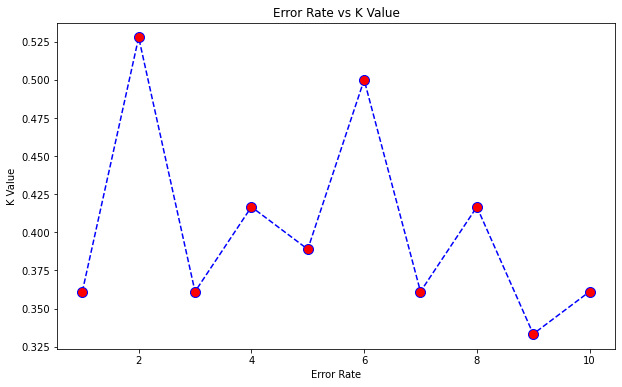

In [99]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11),error_rate,color='blue',linestyle='dashed',
        marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('Error Rate')
plt.ylabel('K Value')

In [100]:
KNN=KNeighborsClassifier(n_neighbors=3)
KNN.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [106]:
y_predict_knn=KNN.predict(x_test)

In [107]:
y_predict_knn

array([2, 1, 1, 3, 3, 3, 1, 2, 2, 1, 2, 2, 2, 3, 3, 2, 2, 2, 3, 1, 3, 1,
       2, 1, 2, 1, 1, 3, 3, 2, 1, 1, 3, 3, 3, 2], dtype=int64)

In [113]:
f1_knn=f1_score(y_test,y_predict_knn,average='weighted')

In [114]:
f1_knn

0.644855072463768

# Prediction from logestic regression

In [115]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [116]:
y_train_predict=lr.predict(x_train)

In [117]:
y_train_predict

array([1.73936904, 1.77097577, 2.27780671, 2.63149884, 2.96786572,
       2.83416461, 2.87952195, 3.16708684, 1.10654981, 2.22026712,
       2.10255872, 1.2998085 , 1.8144348 , 1.86118753, 2.90804886,
       1.54166077, 0.99104332, 2.51642762, 1.88964638, 1.1899627 ,
       2.12585591, 1.01049632, 1.44255551, 2.19115134, 1.89794733,
       1.85681579, 0.62255038, 1.85058453, 1.19217145, 1.20881695,
       1.97305276, 1.12543002, 2.27219016, 1.11861277, 1.12991449,
       2.42218448, 1.60524151, 0.80908043, 1.57873878, 1.03523675,
       0.71909114, 1.96569007, 1.97137898, 2.83144724, 2.98815145,
       2.8967477 , 1.07954461, 2.43396864, 1.77680334, 2.81940186,
       1.14470019, 1.78019872, 1.54182699, 2.03562615, 2.94989999,
       2.56409178, 0.75631403, 2.72202303, 1.23474349, 1.21092237,
       2.09322329, 2.05430721, 1.64435269, 1.17846584, 2.99490266,
       2.00159868, 1.93621009, 2.63886267, 1.10650529, 3.11438553,
       0.83071896, 1.11949247, 3.03947599, 2.10724055, 1.46322